# Titanic - Exploratory Data Analysis

## Table of Contents

1. [Introduction](#introduction)
2. [Dataset Overview](#dataset-overview)
3. [Data Wrangling](#data-wrangling)
   - [Data Quality Assessment](#data-quality-assessment)
   - [Data Cleaning](#data-cleaning)
   - [Feature Engineering](#feature-engineering)
4. [Univariate Analysis](#univariate-analysis)
   - [Categorical Variables](#categorical-variables)
   - [Numerical Variables](#numerical-variables)
5. [Bivariate Analysis](#bivariate-analysis)
6. [Multivariate Analysis](#multivariate-analysis)
7. [Key Insights](#key-insights)


## Introduction

The sinking of the **Titanic** is one of the most famous shipwrecks in history.
On **April 15, 1912**, during her first voyage from Southampton to New York, the Titanic hit an iceberg and sank. Out of **2,224** passengers and crew on board, more than **1,500** people lost their lives.

Although Titanic could have been fitted with as many as **48 lifeboats**, she actually carried only **20**, including four that were collapsible. Altogether they could hold around **1,178 people**, which covered just over half of those who were on board and roughly a third of the ship’s maximum capacity. The situation was made even worse by the chaotic evacuation, during which several boats left the ship without being filled to their limits.




The disaster showed how unprepared the ship was when it came to safety, as there were not enough lifeboats for everyone. Although luck played a role in survival, historical records suggest that some groups of people had better chances than others. Women, children and passengers from higher classes were more likely to survive.

This dataset contains demographic and travel information about the Titanic passengers, including details such as age, sex, ticket class, fare and embarkation port. The goal of this analysis is to explore the data and see what might have increased or reduced the chance of surviving the disaster.

## Dataset

This project uses the [Titanic Dataset from Kaggle](https://www.kaggle.com/datasets/yasserh/titanic-dataset/data). The dataset contains information about the passengers who were on board the Titanic, including their demographics, ticket information, and survival status.

<table>
<thead>
  <tr>
    <th>Variable</th>
    <th>Description</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>PassengerId</td>
    <td>Unique identifier for each passenger</td>
  </tr>
  <tr>
    <td>Survived</td>
    <td>Survival indicator (0 = did not survive, 1 = survived)</td>
  </tr>
  <tr>
    <td>Pclass</td>
    <td>Ticket class (1 = first class, 2 = second class, 3 = third class)</td>
  </tr>
  <tr>
    <td>Name</td>
    <td>Full name of the passenger</td>
  </tr>
  <tr>
    <td>Sex</td>
    <td>Gender of the passenger</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>Age of the passenger in years</td>
  </tr>
  <tr>
    <td>SibSp</td>
    <td>Number of siblings or spouses aboard the Titanic</td>
  </tr>
  <tr>
    <td>Parch</td>
    <td>Number of parents or children aboard the Titanic</td>
  </tr>
  <tr>
    <td>Ticket</td>
    <td>Ticket number</td>
  </tr>
  <tr>
    <td>Fare</td>
    <td>Ticket fare</td>
  </tr>
  <tr>
    <td>Cabin</td>
    <td>Cabin number</td>
  </tr>
  <tr>
    <td>Embarked</td>
    <td>Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)</td>
  </tr>
</tbody>

## Setup

In [2]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the visual style
sns.set_theme(context="notebook", style="whitegrid")

## Data Overview

In [3]:
# Load the dataset
titanic_df = pd.read_csv("Titanic-Dataset.csv")

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.shape

(891, 12)

The dataset contains 891 rows and 12 columns.

In [5]:
titanic_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 315.0 KB


In [6]:
titanic_df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Data Wrangling

### Data Quality Assessment

In [7]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
titanic_df.duplicated().sum()

np.int64(0)

In [9]:
titanic_df["Name"].duplicated().sum()

np.int64(0)

In [10]:
for col in titanic_df.columns:
    print(f"Unique values in '{col}': {len(titanic_df[col].unique())}")

Unique values in 'PassengerId': 891
Unique values in 'Survived': 2
Unique values in 'Pclass': 3
Unique values in 'Name': 891
Unique values in 'Sex': 2
Unique values in 'Age': 89
Unique values in 'SibSp': 7
Unique values in 'Parch': 7
Unique values in 'Ticket': 681
Unique values in 'Fare': 248
Unique values in 'Cabin': 148
Unique values in 'Embarked': 4


In [11]:
category_columns = ["Survived", "Pclass", "Sex", "Embarked"]
for col in category_columns:
    display(titanic_df[col].value_counts(dropna=False))

Survived
0    549
1    342
Name: count, dtype: int64

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Sex
male      577
female    314
Name: count, dtype: int64

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

The dataset has some missing values: **177 in Age**, **687 in Cabin**, and **2 in Embarked**. There are **no duplicate** rows. Some columns have only a few unique values, so it makes sense to change their type to **category**. These are **Pclass**, **Sex**, and **Embarked**. Apart from that, the dataset looks fairly clean, but the missing values and data types need to be fixed before further analysis.T

### Data Cleaning

In [12]:
# Drop unnecessary columns
titanic_df.drop(columns=["PassengerId"], inplace=True)

# Fill missing values in 'Embarked' with the mode
titanic_df["Embarked"] = titanic_df["Embarked"].fillna(titanic_df["Embarked"].mode()[0])

# Map the embarked ports
ports = {
    "C": "Cherbourg",
    "Q": "Queenstown",
    "S": "Southampton"
}
titanic_df.replace({"Embarked": ports}, inplace=True)

# Capitalize the first letter of the sex column
titanic_df["Sex"] = titanic_df["Sex"].str.capitalize()

# Convert data types
titanic_df["Age"] = titanic_df["Age"].astype("float32")
titanic_df["Fare"] = titanic_df["Fare"].astype("float32")
titanic_df["SibSp"] = titanic_df["SibSp"].astype("int8")
titanic_df["Parch"] = titanic_df["Parch"].astype("int8")
titanic_df["Survived"] = titanic_df["Survived"].astype("bool")
titanic_df["Pclass"] = titanic_df["Pclass"].astype("category")
titanic_df["Sex"] = titanic_df["Sex"].astype("category")
titanic_df["Embarked"] = titanic_df["Embarked"].astype("category")

display(titanic_df.info(memory_usage="deep"))
display(titanic_df.head())
display(titanic_df["Cabin"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    bool    
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float32 
 5   SibSp     891 non-null    int8    
 6   Parch     891 non-null    int8    
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float32 
 9   Cabin     204 non-null    object  
 10  Embarked  891 non-null    category
dtypes: bool(1), category(3), float32(2), int8(2), object(3)
memory usage: 175.0 KB


None

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,3,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.250000,NaN,Southampton
1,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.283302,C85,Cherbourg
2,True,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.925000,NaN,Southampton
3,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.099998,C123,Southampton
4,False,3,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.050000,NaN,Southampton


Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

During the cleaning process the column **PassengerId** was removed as it does not bring useful information. Missing values in **Embarked** were filled with the most common port and then mapped to full names. The values in **Sex** were standardized by capitalizing the first letter. Several columns had their data types adjusted for clarity and efficiency: numerical values were converted to smaller numeric types, the target variable **Survived** was set as boolean, and categorical features (**Pclass**, **Sex**, **Embarked**) were converted to the category type. The dataset is now more consistent and ready for further analysis.

### Feature Engineering

In [13]:
# Family size and isolation
titanic_df["FamilySize"] = titanic_df["SibSp"] + titanic_df["Parch"] + 1
titanic_df["FamilySize"] = titanic_df["FamilySize"].astype("int8")
titanic_df["IsAlone"] = (titanic_df["FamilySize"] == 1).astype("bool")

# Deck from Cabin
titanic_df["Deck"] = titanic_df["Cabin"].astype("string").str[0].str.upper()
titanic_df["Deck"] = titanic_df["Deck"].where(titanic_df["Deck"].isin(list("ABCDEFG")), other="U").astype("category")
display(titanic_df["Deck"].value_counts(dropna=False))

# Title from Name
titanic_df["Title"] = titanic_df["Name"].str.extract(r",\s*([^\.]+)\.", expand=False)
titanic_df["Title"] = titanic_df["Title"].str.strip().str.title().astype("category")
display(titanic_df["Title"].value_counts(dropna=False))

# Fill missing Age values using Title, Sex and Pclass
titanic_df["Age"] = titanic_df.groupby(["Title", "Sex", "Pclass"], observed=True)["Age"].transform(lambda x: x.fillna(x.median()))

display(titanic_df["Age"].isnull().sum())
display(titanic_df.info())
display(titanic_df.describe(include="all"))
display(titanic_df.head())

# Save the cleaned dataset
titanic_df.to_csv("Titanic-Dataset-Cleaned.csv", index=False)
titanic_df.to_pickle("Titanic-Dataset-Cleaned.pkl")

Deck
U    688
C     59
B     47
D     33
E     32
A     15
F     13
G      4
Name: count, dtype: int64

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Capt              1
Lady              1
Don               1
Jonkheer          1
Mme               1
Ms                1
Sir               1
The Countess      1
Name: count, dtype: int64

np.int64(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    bool    
 1   Pclass      891 non-null    category
 2   Name        891 non-null    object  
 3   Sex         891 non-null    category
 4   Age         891 non-null    float32 
 5   SibSp       891 non-null    int8    
 6   Parch       891 non-null    int8    
 7   Ticket      891 non-null    object  
 8   Fare        891 non-null    float32 
 9   Cabin       204 non-null    object  
 10  Embarked    891 non-null    category
 11  FamilySize  891 non-null    int8    
 12  IsAlone     891 non-null    bool    
 13  Deck        891 non-null    category
 14  Title       891 non-null    category
dtypes: bool(2), category(5), float32(2), int8(3), object(3)
memory usage: 38.1+ KB


None

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Deck,Title
count,891,891.0,891,891,891.000000,891.000000,891.000000,891,891.000000,204,891,891.000000,891,891,891
unique,2,3.0,891,2,NaN,NaN,NaN,681,NaN,147,3,NaN,2,8,17
top,False,3.0,"Dooley, Mr. Patrick",Male,NaN,NaN,NaN,347082,NaN,G6,Southampton,NaN,True,U,Mr
freq,549,491.0,1,577,NaN,NaN,NaN,7,NaN,4,646,NaN,537,688,517
mean,NaN,NaN,NaN,NaN,29.143850,0.523008,0.381594,NaN,32.204208,NaN,NaN,1.904602,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,13.496074,1.102743,0.806057,NaN,49.693432,NaN,NaN,1.613459,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN,1.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,26.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,1.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,36.750000,1.000000,0.000000,NaN,31.000000,NaN,NaN,2.000000,NaN,NaN,NaN


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Deck,Title
0,False,3,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.250000,NaN,Southampton,2,False,U,Mr
1,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.283302,C85,Cherbourg,2,False,C,Mrs
2,True,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.925000,NaN,Southampton,1,True,U,Miss
3,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.099998,C123,Southampton,2,False,C,Mrs
4,False,3,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.050000,NaN,Southampton,1,True,U,Mr


Several new features were created to enrich the dataset. **FamilySize** was calculated from the number of siblings, spouses, parents and children, and a binary feature **IsAlone** was added to indicate passengers traveling without family. The **Deck** variable was extracted from the cabin number, with unknown values marked as U. **Titles** such as Mr, Mrs, or Miss were extracted from the Name column to provide additional social context. Finally, missing values in **Age** were filled with the median age within each group defined by Title, Sex, and Pclass, which makes the distribution of ages more consistent and realistic.

## Univariate Analysis

### Categorical Variables

#### Survived

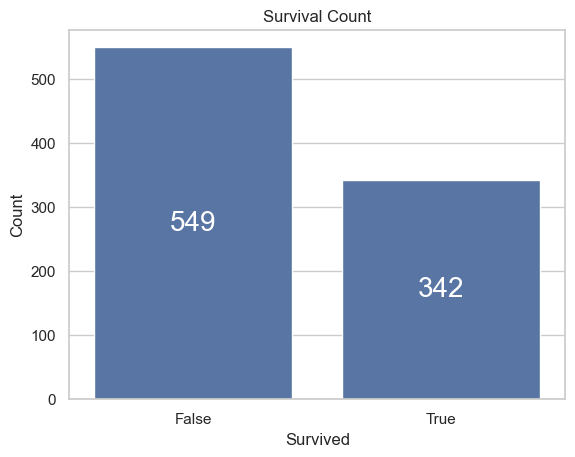

Survival Rate: 38.38%


In [14]:
ax = sns.countplot(data=titanic_df, x="Survived")
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Count")
for container in ax.containers:
    ax.bar_label(container, fontsize=20, label_type='center', color='white')
plt.show()
print(f"Survival Rate: {titanic_df['Survived'].mean():.2%}")


#### Sex

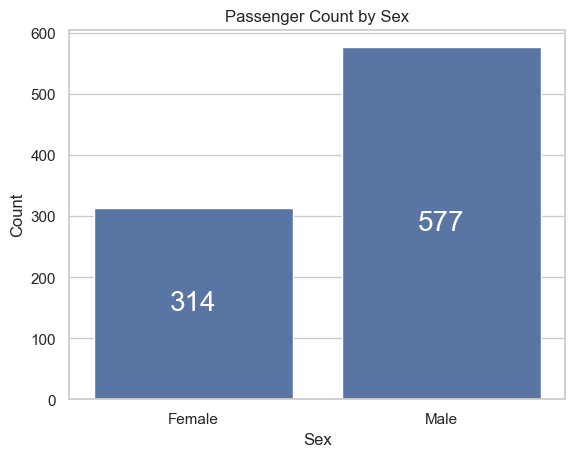

Sex
Male      64.76%
Female    35.24%
Name: proportion, dtype: object


In [15]:
ax = sns.countplot(data=titanic_df, x="Sex")
plt.title("Passenger Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
for container in ax.containers:
    ax.bar_label(container, fontsize=20, label_type='center', color='white')
plt.show()

print(titanic_df["Sex"].value_counts(normalize=True).map("{:.2%}".format))

#### Pclass

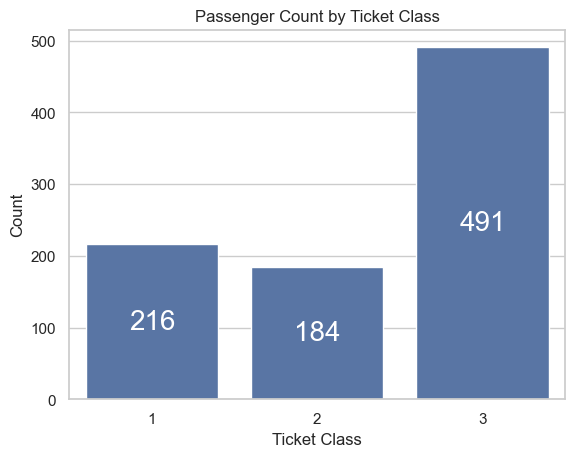

Pclass
3    55.11%
1    24.24%
2    20.65%
Name: proportion, dtype: object


In [16]:
ax = sns.countplot(data=titanic_df, x="Pclass")
plt.title("Passenger Count by Ticket Class")
plt.xlabel("Ticket Class")
plt.ylabel("Count")
for container in ax.containers:
    ax.bar_label(container, fontsize=20, label_type='center', color='white')
plt.show()


print(titanic_df["Pclass"].value_counts(normalize=True).map("{:.2%}".format))

#### Embarked

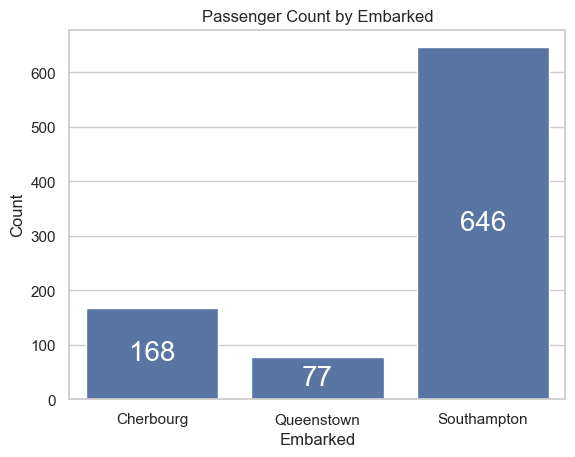

Embarked
Southampton    72.50%
Cherbourg      18.86%
Queenstown      8.64%
Name: proportion, dtype: object


In [17]:
ax = sns.countplot(data=titanic_df, x="Embarked")
plt.title("Passenger Count by Embarked")
plt.xlabel("Embarked")
plt.ylabel("Count")
for container in ax.containers:
    ax.bar_label(container, fontsize=20, label_type='center', color='white')
plt.show()

print(titanic_df["Embarked"].value_counts(normalize=True).map("{:.2%}".format))

#### Deck

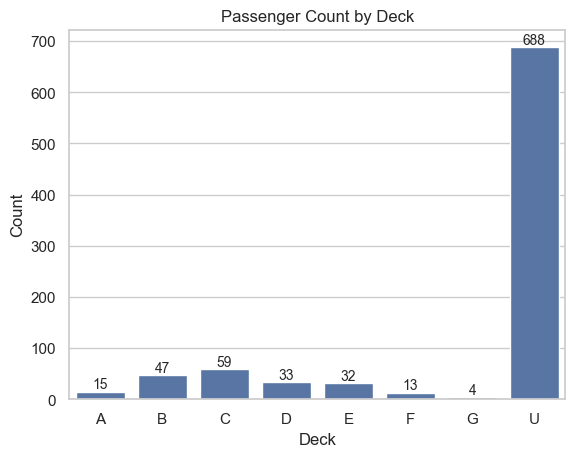

Deck
U    77.22%
C     6.62%
B     5.27%
D     3.70%
E     3.59%
A     1.68%
F     1.46%
G     0.45%
Name: proportion, dtype: object


In [18]:
ax = sns.countplot(data=titanic_df, x="Deck")
plt.title("Passenger Count by Deck")
plt.xlabel("Deck")
plt.ylabel("Count")
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.show()

print(titanic_df["Deck"].value_counts(normalize=True).map("{:.2%}".format))

#### IsAlone

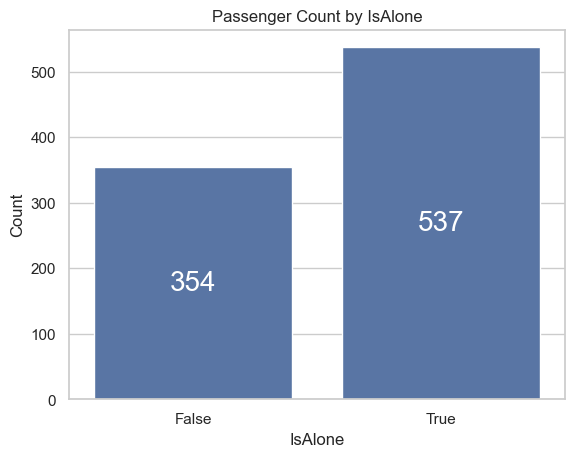

IsAlone
True     60.27%
False    39.73%
Name: proportion, dtype: object


In [19]:
ax = sns.countplot(data=titanic_df, x="IsAlone")
plt.title("Passenger Count by IsAlone")
plt.xlabel("IsAlone")
plt.ylabel("Count")
for container in ax.containers:
    ax.bar_label(container, fontsize=20, label_type='center', color='white')
plt.show()

print(titanic_df["IsAlone"].value_counts(normalize=True).map("{:.2%}".format))

### Numerical Variables

#### Age

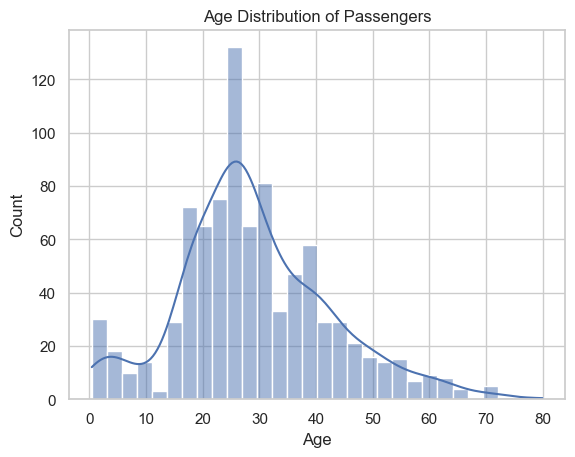

count    891.000000
mean      29.143850
std       13.496074
min        0.420000
25%       21.000000
50%       26.000000
75%       36.750000
max       80.000000
Name: Age, dtype: float64

In [20]:
sns.histplot(data=titanic_df, x="Age", bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

titanic_df["Age"].describe()

#### Fare

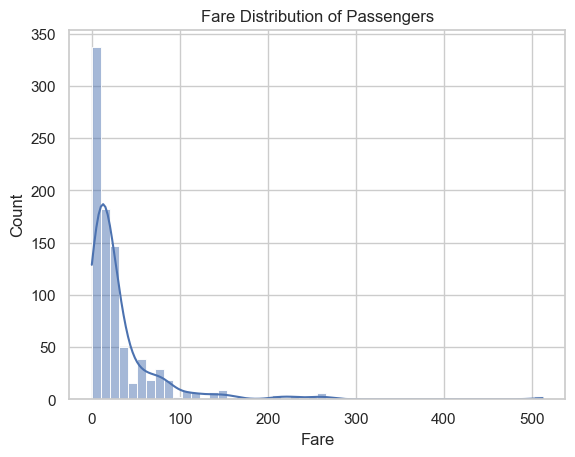

count    891.000000
mean      32.204208
std       49.693432
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329224
Name: Fare, dtype: float64

In [21]:
sns.histplot(data=titanic_df, x="Fare", bins=50, kde=True)
plt.title("Fare Distribution of Passengers")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

titanic_df["Fare"].describe()

#### SibSp

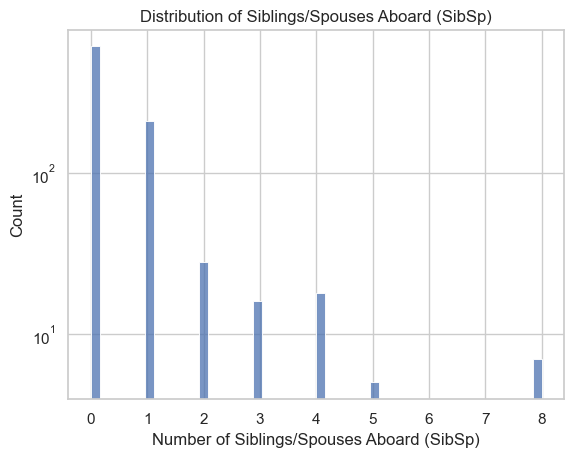

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [22]:
sns.histplot(data=titanic_df, x="SibSp", bins=50)
plt.title("Distribution of Siblings/Spouses Aboard (SibSp)")
plt.xlabel("Number of Siblings/Spouses Aboard (SibSp)")
plt.ylabel("Count")
plt.yscale('log')
plt.show()

titanic_df["SibSp"].describe()

#### Parch

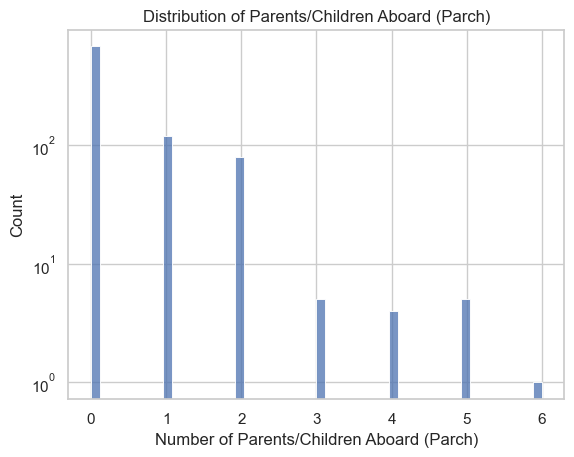

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [23]:
sns.histplot(data=titanic_df, x="Parch", bins=50)
plt.title("Distribution of Parents/Children Aboard (Parch)")
plt.xlabel("Number of Parents/Children Aboard (Parch)")
plt.ylabel("Count")
plt.yscale('log')
plt.show()

titanic_df["Parch"].describe()

#### FamilySize

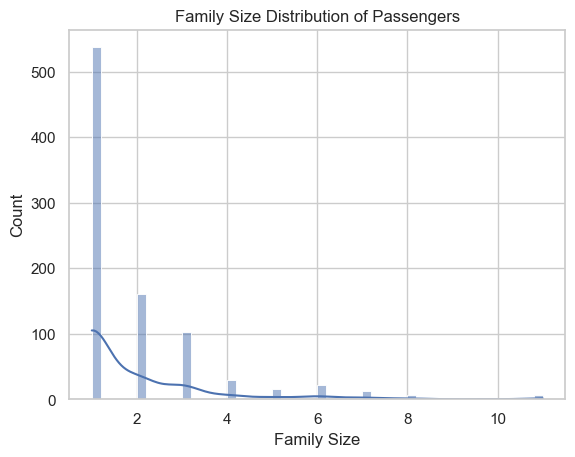

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamilySize, dtype: float64

In [24]:
sns.histplot(data=titanic_df, x="FamilySize", bins=50, kde=True)
plt.title("Family Size Distribution of Passengers")
plt.xlabel("Family Size")
plt.ylabel("Count")
plt.show()

titanic_df["FamilySize"].describe()

### Summary

- The **survival rate** was approximately **38%**, indicating that a majority of passengers did not survive the disaster.

- The dataset shows that there are more **male passengers (64.76%)** than **female passengers (35.24%)**.
- Most passengers traveled in **third class (55.11%)**, and the majority embarked from **Southampton (72.5%)**.
- A significant portion of passengers **traveled alone (60.27%)**, with the remaining **39.73% traveling with family**.
- The age distribution reveals that passengers were mostly **aged between 20 and 40 years**.
- The **average fare** paid by passengers was approximately **32.2**, with some passengers paying extremely high fares, the **highest being 512.3292**.
- Family sizes varied, with many passengers traveling alone or in small groups, while a few had large families on board, the **largest being a family of 11**.

## Bivariate Analysis

### Survived vs Sex

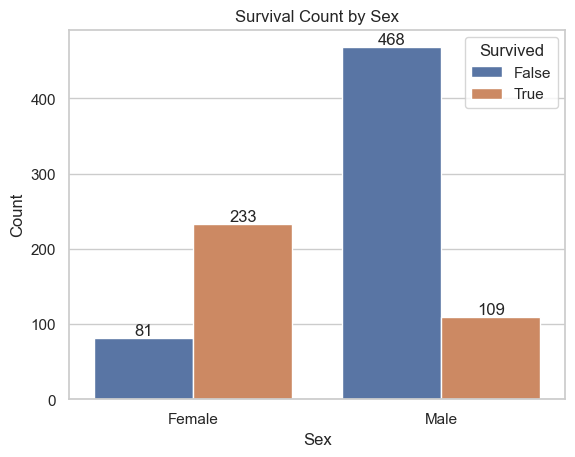

In [73]:
sns.countplot(data=titanic_df, x="Sex", hue="Survived")
plt.title("Survival Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Survived")
for container in plt.gca().containers:
    plt.gca().bar_label(container, fontsize=12)
plt.show()

### Survived vs Pclass

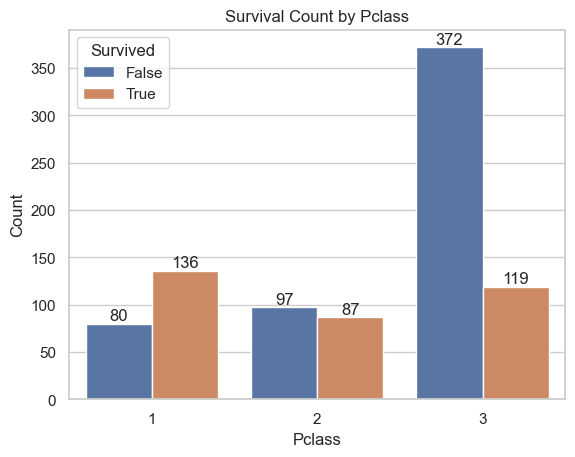

In [74]:
sns.countplot(data=titanic_df, x="Pclass", hue="Survived")
plt.title("Survival Count by Pclass")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.legend(title="Survived")
for container in plt.gca().containers:
    plt.gca().bar_label(container, fontsize=12)
plt.show()

### Survived vs Embarked

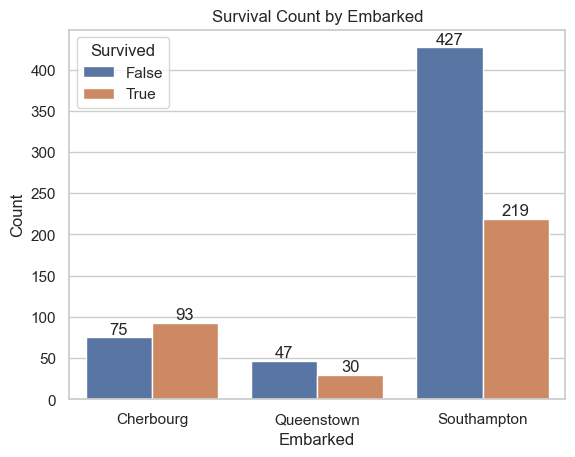

In [75]:
sns.countplot(data=titanic_df, x="Embarked", hue="Survived")
plt.title("Survival Count by Embarked")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.legend(title="Survived")
for container in plt.gca().containers:
    plt.gca().bar_label(container, fontsize=12)
plt.show()

### Embarked vs Pclass

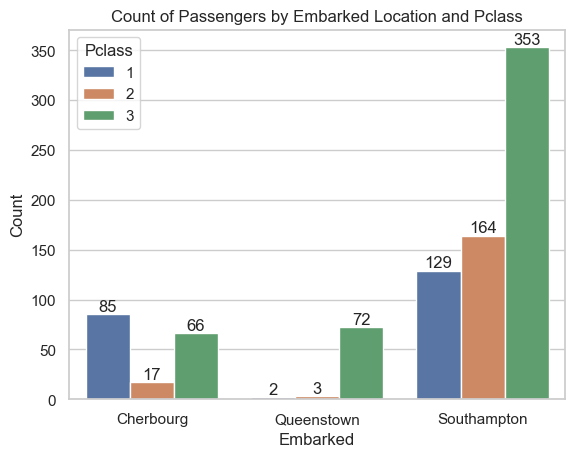

In [28]:
sns.countplot(data=titanic_df, x="Embarked", hue="Pclass")
plt.title("Count of Passengers by Embarked Location and Pclass")
plt.ylabel("Count")
for container in plt.gca().containers:
    plt.gca().bar_label(container, fontsize=12)
plt.show()

### Survived vs Deck

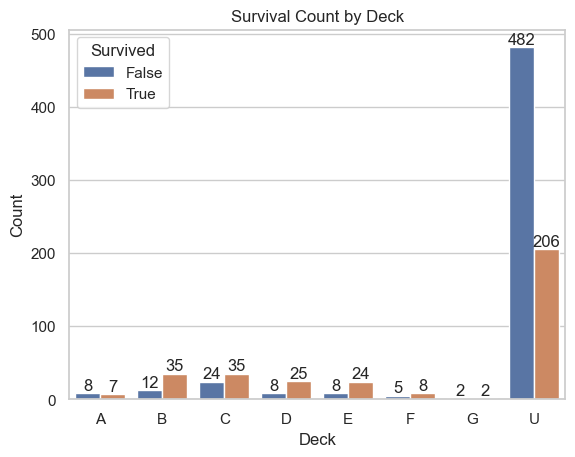

In [29]:
sns.countplot(data=titanic_df, x="Deck", hue="Survived")
plt.title("Survival Count by Deck")
plt.xlabel("Deck")
plt.ylabel("Count")
plt.legend(title="Survived")
for container in plt.gca().containers:
    plt.gca().bar_label(container, fontsize=12)
plt.show()

### Survived vs IsAlone

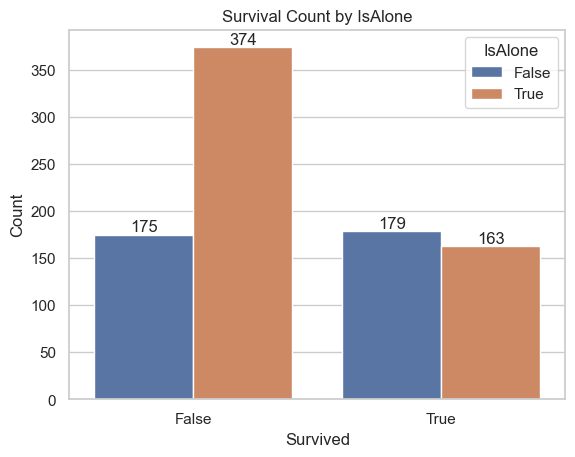

In [30]:
sns.countplot(data=titanic_df, x="Survived", hue="IsAlone")
plt.title("Survival Count by IsAlone")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.legend(title="IsAlone")
for container in plt.gca().containers:
    plt.gca().bar_label(container, fontsize=12)
plt.show()

### Survived vs Age

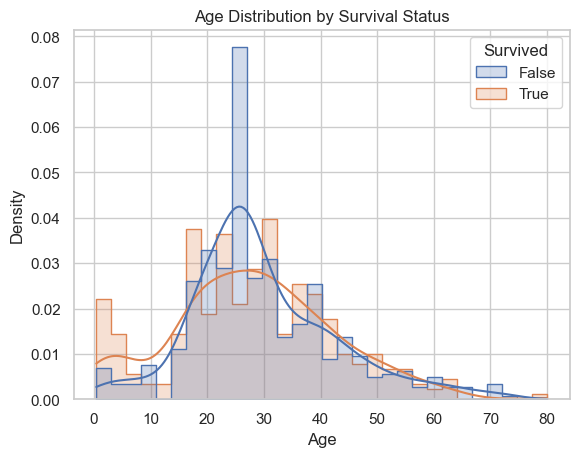

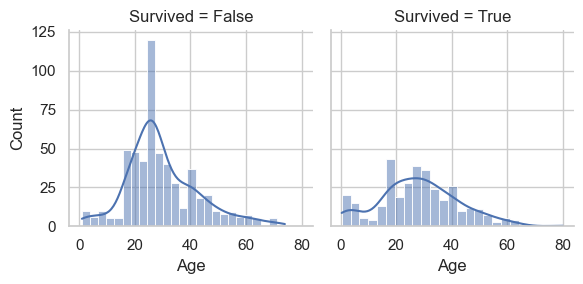

In [31]:

sns.histplot(data=titanic_df, x="Age", hue="Survived", bins=30, kde=True, element="step", stat="density", common_norm=False)
plt.title("Age Distribution by Survival Status")

g = sns.FacetGrid(titanic_df, col = "Survived")
g.map(sns.histplot, "Age", bins = 25, kde=True)
plt.show()

### Survived vs FamilySize

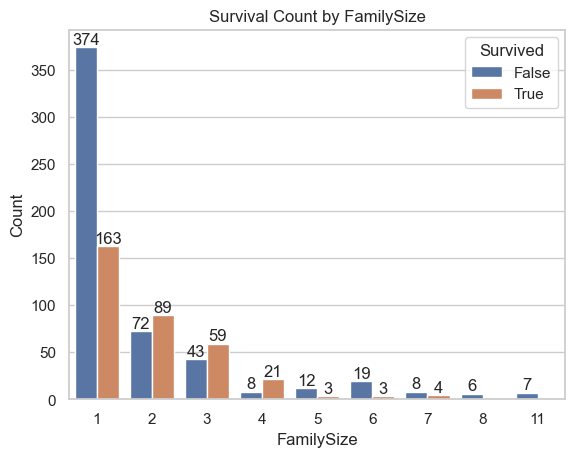

In [32]:
sns.countplot(data=titanic_df, x="FamilySize", hue="Survived")
plt.title("Survival Count by FamilySize")
plt.xlabel("FamilySize")
plt.ylabel("Count")
plt.legend(title="Survived")
for container in plt.gca().containers:
    plt.gca().bar_label(container, fontsize=12)
plt.show()

### Survived vs Fare

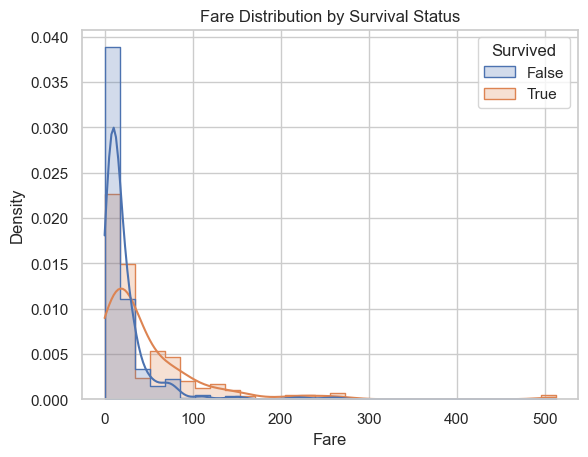

In [33]:
sns.histplot(data=titanic_df, x="Fare", hue="Survived", bins=30, kde=True, element="step", stat="density", common_norm=False)
plt.title("Fare Distribution by Survival Status")
plt.xlabel("Fare")
plt.ylabel("Density")
plt.show()

### Summary

- **Survived vs Sex**: Women had a much higher survival rate than men, confirming that gender was one of the most important factors, which aligns with historical accounts indicating that women and children were prioritized in lifeboat allocation.

- **Survived vs Pclass**: Passengers in higher classes (1st class) had a better chance of survival compared to those in lower classes (2nd and 3rd class). This reflects the social class disparity during the disaster, where wealthier passengers were given priority in the lifeboats.
- **Survived vs Embarked**: Passengers who boarded at Cherbourg had a noticeably higher survival rate compared to those from Southampton and Queenstown.
- **Embarked vs Pclass**: Among passengers from Cherbourg, there were the most first-class passengers, which may have contributed to the higher survival rate among these passengers.
- **Survived vs Deck**: Passengers on decks B, D, E had better survival rates.
- **Survived vs IsAlone**: Passengers traveling alone had a lower survival rate compared to those with family.
- **Survived vs Age**: Younger passengers, especially children, had a higher survival rate.
- **Survived vs FamilySize**: Passengers with small families (2-4 members) had higher survival rates compared to those traveling alone or in large families.
- **Survived vs Fare**: Higher ticket prices were associated with higher survival rates, likely because more expensive tickets were linked to higher classes.

## Multivariate Analysis

### Survived by Age and Sex

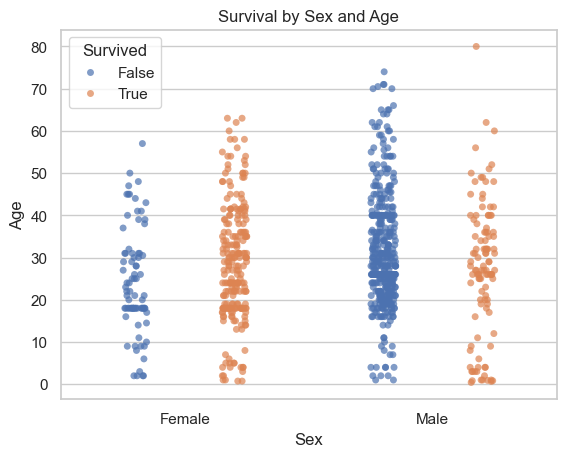

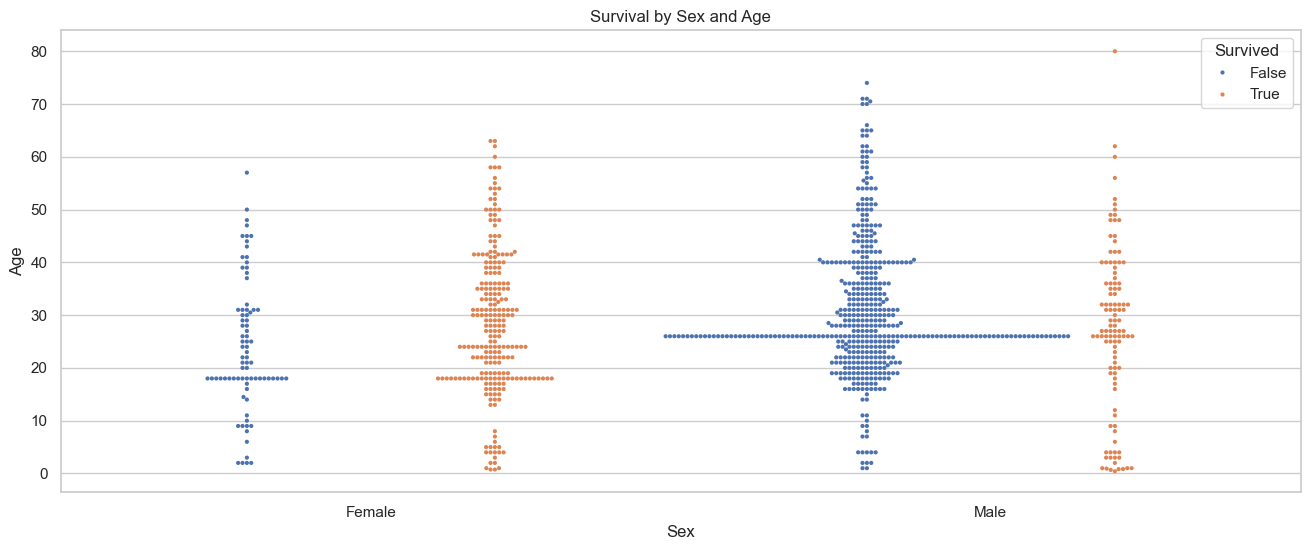

In [52]:
sns.stripplot(data=titanic_df, x="Sex", y="Age", hue="Survived", jitter=True, dodge=True, alpha=0.7)
plt.title("Survival by Sex and Age")
plt.show()

plt.figure(figsize=(16, 6))
sns.swarmplot(data=titanic_df, x="Sex", y="Age", hue="Survived", dodge=True, size=3)
plt.title("Survival by Sex and Age")
plt.show()

### Survived by Age and FamilySize

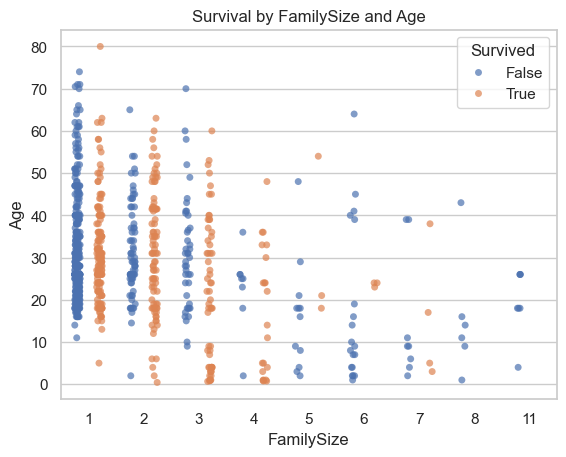

In [72]:
sns.stripplot(data=titanic_df, x="FamilySize", y="Age", hue="Survived", jitter=True, dodge=True, alpha=0.7)
plt.title("Survival by FamilySize and Age")
plt.show()

### Survived by Fare and Pclass

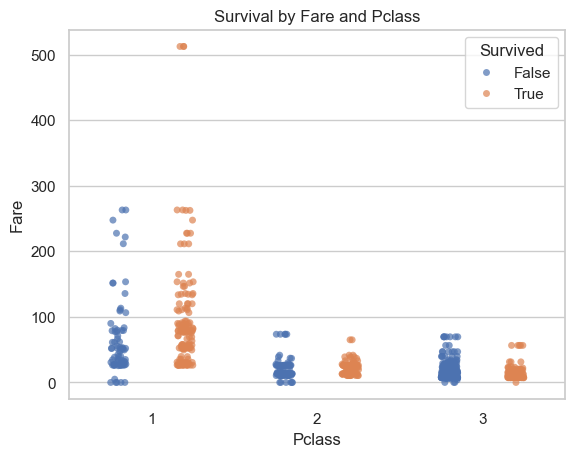

In [62]:
sns.stripplot(data=titanic_df, x="Pclass", y="Fare", hue="Survived", jitter=True, dodge=True, alpha=0.7)
plt.title("Survival by Fare and Pclass")
plt.show()

### Survived by Embarked and Pclass

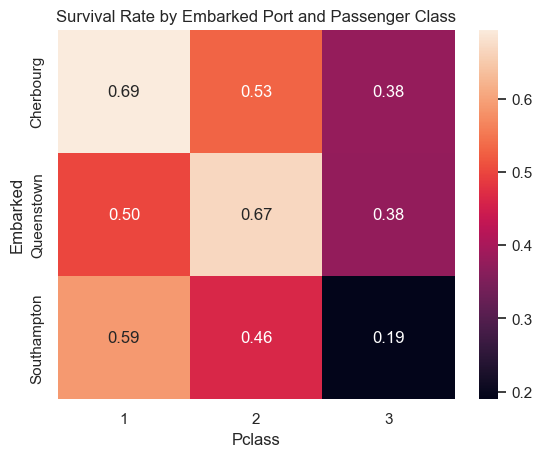

In [37]:
pivot = pd.pivot_table(titanic_df, values="Survived", index="Embarked", columns="Pclass", aggfunc="mean", observed=False)
sns.heatmap(pivot, annot=True, fmt=".2f")
plt.title("Survival Rate by Embarked Port and Passenger Class") 
plt.show()


### Correlation Heatmap

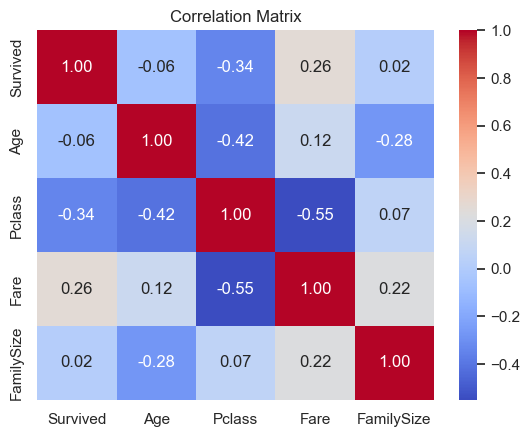

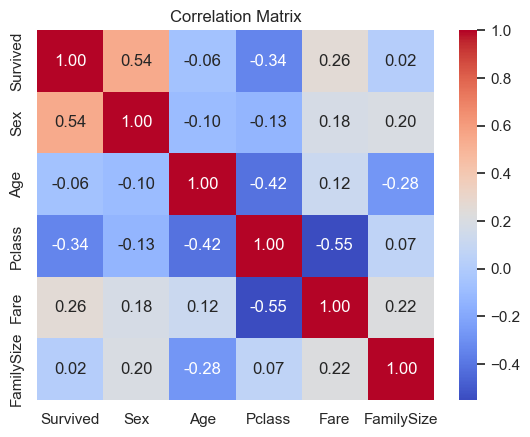

In [ ]:
correlation_matrix = titanic_df[["Survived", "Age", "Pclass", "Fare", "FamilySize"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Encode 'Sex' column for correlation analysis
titanic_df_encoded = titanic_df.copy()
titanic_df_encoded["Sex"] = titanic_df_encoded["Sex"].map({"Male": 0, "Female": 1})
correlation_matrix = titanic_df_encoded[["Survived", "Sex", "Age", "Pclass", "Fare", "FamilySize"]].corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Pairplot

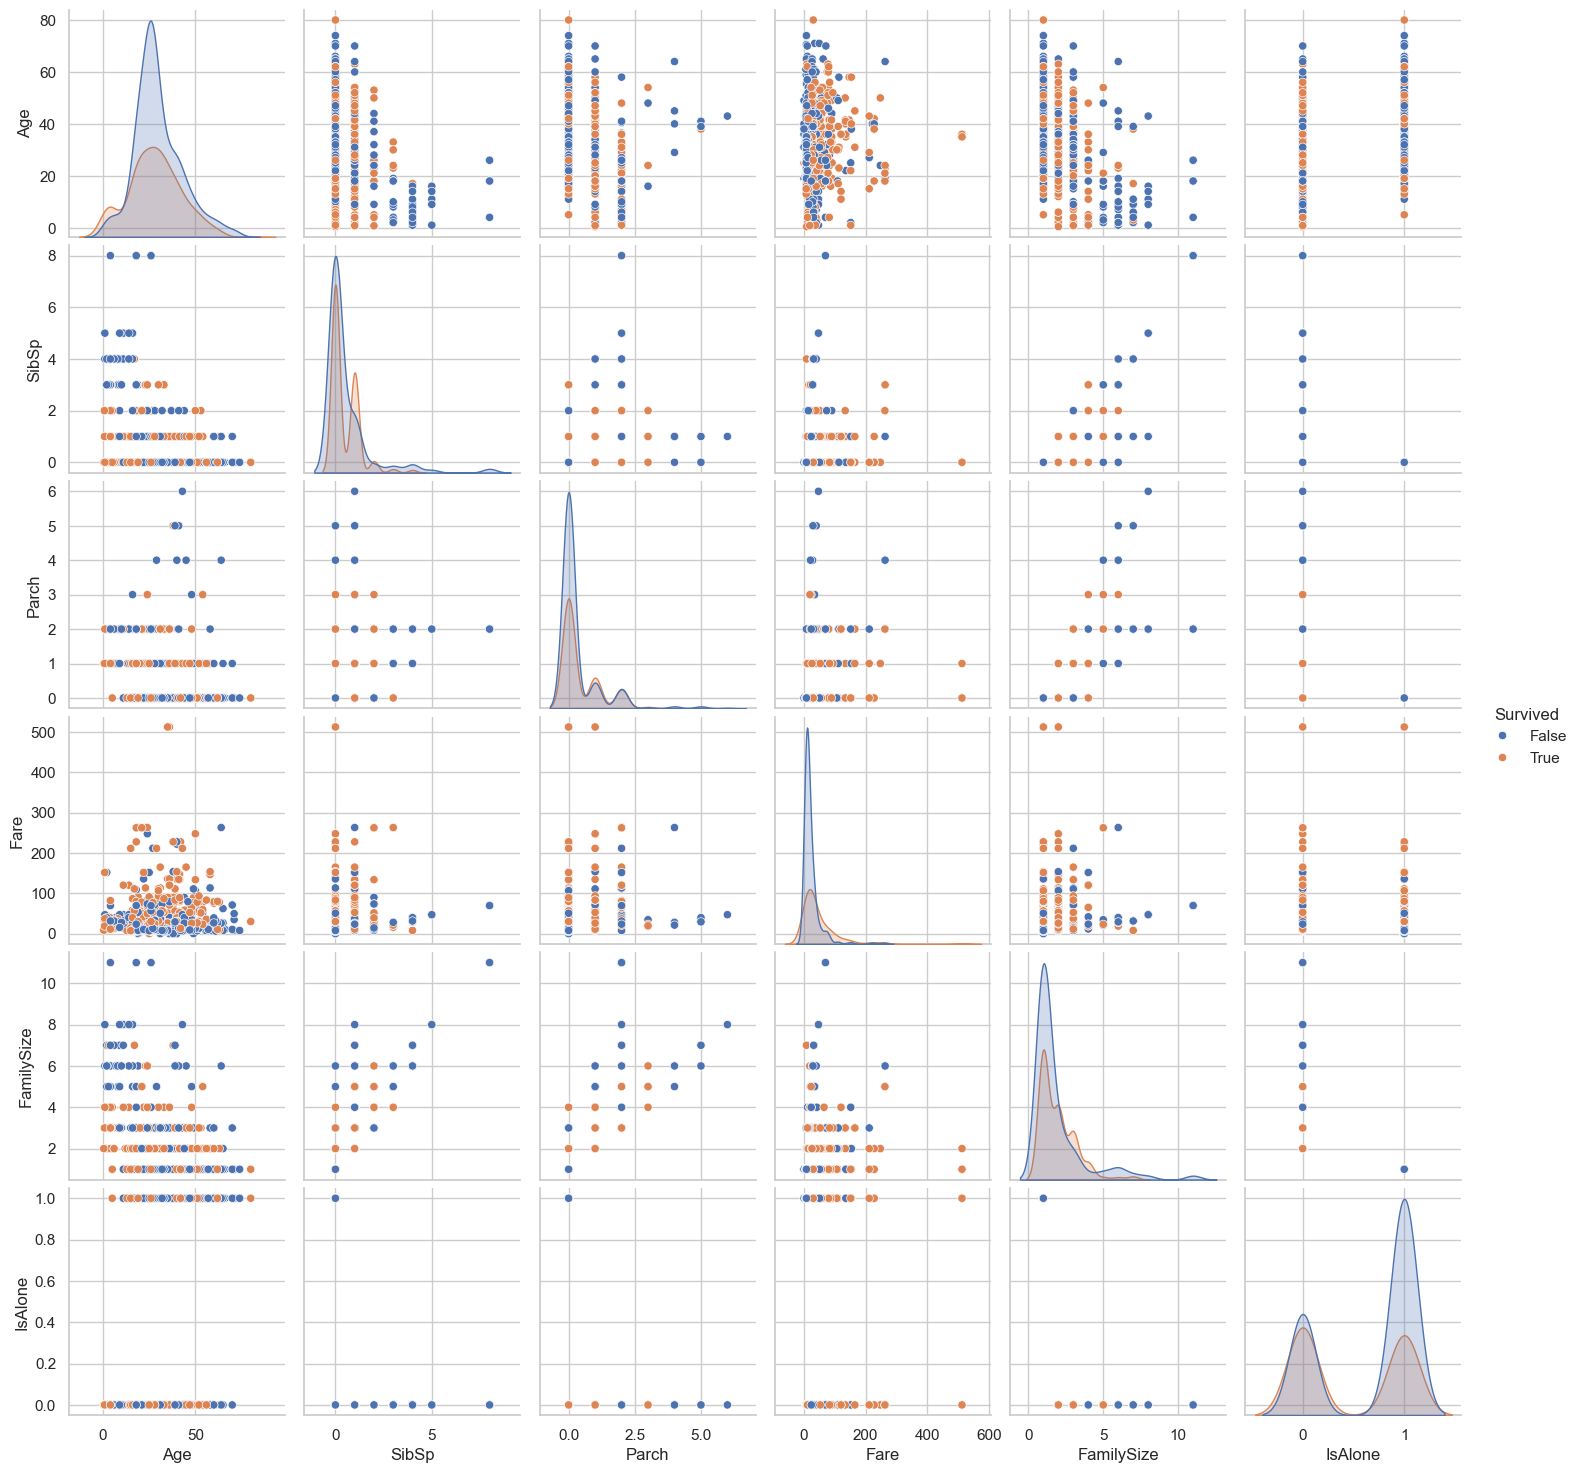

In [71]:
sns.pairplot(titanic_df, hue='Survived', diag_kind='kde')
plt.show()

### Summary

- **Survived by Age and Sex**: Gender appears to be a dominant factor in determining survival, with a significantly **higher proportion of females surviving compared to males**. Age also played a crucial role, particularly for men, where the **highest concentration of fatalities occurred among those aged roughly 20 to 40**. In contrast, women's chances of survival were **high across a broad range of ages**. Furthermore, **children**, especially young boys, **had a noticeably better chance of survival** than adult men.

- **Survived by Age and FamilySize**: Individuals traveling alone faced a notably lower chance of survival, with a high concentration of fatalities among adults between 20 and 40 years old. In contrast, passengers in **small to medium-sized families, specifically those with 2 to 4 members, had the highest survival rates**. Within these smaller family units, a significant number of children survived, suggesting they were given priority. However, as family size increased beyond four members, the chances of survival dropped dramatically, indicating that larger families struggled to evacuate and stay together, leading to a much higher fatality.

- **Survived by Fare and Pclass**: Passengers in the first class, who paid the highest fares, had a significantly greater chance of surviving.

- **Survived by Embarked and Pclass**: Passengers who embarked in **Cherbourg** had the best odds, especially in **first class (69% survival)**, while passengers from **Southampton** fared the worst. **Third-class** passengers from **Southampton** had only a **19%** chance of survival.

- **Correlation Heatmap**: **Sex** was the single most significant predictor of survival, with a strong **positive correlation of 0.54**. The next most significant predictor was **passenger class**, which shows a **moderate negative correlation of -0.34** with survival. This indicates that as the class number decreased (meaning a higher class like first class), the likelihood of survival increased. Similarly, the **fare** paid for the ticket has a **positive correlation of 0.26** with survival, meaning higher-priced tickets were associated with a better chance of living. These two factors are strongly linked, as shown by their own strong negative correlation (-0.55). In contrast, both age and family size show very weak linear relationships with survival, suggesting that on their own, they were not strong direct predictors. The heatmap also reveals other relationships, such as a moderate negative correlation between class and age, suggesting that passengers in higher classes tended to be older.

## Key Insights

### 1. Gender Was the Primary Predictor of Survival
- Women had an 74% survival rate compared to only 19% for men.
- Sex showed the strongest correlation with survival (0.54), making it the single most important predictor.
- The "women and children first" protocol appears to have been consistently applied during the evacuation.

### 2. Socioeconomic Status Was a Decisive Factor
- First-class passengers had a 63% survival rate, compared to 47% for second class and a mere 24% for third class.
- Passenger class exhibited a moderate negative correlation with survival (-0.34), meaning a higher class (lower number) increased survival odds.
- Ticket fare also showed a positive correlation with survival (0.26), as higher-priced tickets corresponded to higher-class accommodations.
- The wealthy literally had better access to lifeboats and evacuation procedures.

### 3. Family Size Influenced Survival in Complex Ways
- Passengers in small families (2-4 members) had the highest probability of survival.
- Traveling alone was a significant disadvantage, resulting in a lower survival rate than for those in small groups.
- Large families (5+ members) faced logistical challenges during the chaos, which drastically reduced their chances of survival.

### 4. Age Effects Were Conditional on Other Factors
- Children were clearly prioritized, with their survival rates bucking the trend seen for their gender (especially young boys).
- The highest-risk demographic consisted of adult men between the ages of 20 and 40.
- By itself, age was a weak predictor, with its impact being heavily mediated by gender and class.

### 5. Port of Embarkation Acted as a Proxy for Class
- Passengers from Cherbourg had the highest survival rate (55%), followed by Queenstown (39%) and Southampton (34%).
- Cherbourg had the highest proportion of first-class passengers relative to other classes at that port, explaining the survival advantage.